<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Now we shall implement the Sqz PES (Nakamura, H., Mil'nikov, G. (2013). Quantum Mechanical Tunneling in Chemical Physics. Boca Raton: CRC Press, https://doi.org/10.1201/b14673), where the PES is given by

\begin{align}
  V = \frac{1}{8}(x-1)^2(x+1)^2 + \frac{1}{2} \left[\omega_y^2 - \gamma (x^2 - 1) \right]y^2
\end{align}

Here the user can vary $\omega_y^2 = \frac{\text{d}^2 V}{\text{d}y^2}$.

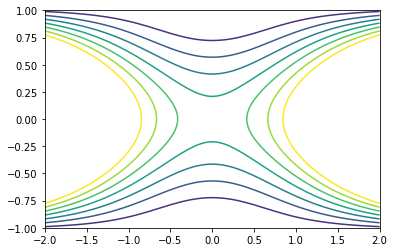

<function __main__.plot_contours>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy # will not be used, but just want to know availability
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# input-hidden
%matplotlib inline
def V_sqz(x, omega_y, gamma):
  x, y = x[...,0], x[...,1]
  V=0.125*(x-1)**2*(x+1)**2 + 0.5*(omega_y**2 - gamma*(x**2-1))*y**2
  return V

def plot_contours(omega_y):
  # generate potential values
  gamma=0.2
  npts=100 # give user as option?
  x=np.linspace(-2, 2, npts)
  y=np.linspace(-2, 2, npts)
  V=np.empty((npts,npts))
  for i in range(npts):
    for j in range(npts):
      V[i,j]=V_sqz(np.array([x[i], y[j]]), omega_y, gamma)

  # contour plot generation
  ax=plt.gca()
  X, Y=np.meshgrid(x, y)
  CS=ax.contour(X, Y, V, np.linspace(0,0.2,8))
  ax.set_xbound(-2,2)
  ax.set_ybound(-1.0,1.0)
  
interact(plot_contours, omega_y=widgets.FloatSlider(min=0.1, max=0.5, step=0.1, value=0.1)) 